In [82]:
import sys
import matplotlib.animation
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *
from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

%matplotlib inline

spont = True
stim_sheet_name = "V1_Exc_L2/3"

if not spont:
    ddir_vis = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/VIS_LARGE/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir_vis = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/VIS/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir_vis = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/VIS_LARGE_C_2_4/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    data_store_vis = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':ddir_vis,'store_stimuli': None}),replace=True)
    
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/20250108-092412[param.defaults]CombinationParamSearch{trial:[1],null_stimulus_period:[150]}/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.06_EXC_LARGE_60stimneurons/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.06_EXC_LARGE/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.06_EXC_LARGE_1mstim/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.06_EXC_LARGE_C2_4/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.1_EXC_LARGE_C2_4/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.03_EXC/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.03_INH/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.06_EXC/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/GRAT_STIM=0.06_INH/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
else:
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/20250108-092514[param.defaults]CombinationParamSearch{trial:[1],null_stimulus_period:[150]}/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    
    ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/SPONT_STIM=0.06_EXC_LARGE/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/SPONT_STIM=0.03_EXC/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    #ddir = '/home/antolikjan/projects/mozaikluca/mozaik-contrib/BenScholl/SPONT_STIM=0.06_EXC/SelfSustainedPushPull_ParameterSearch_____null_stimulus_period:150_trial:1'
    data_store_vis = None

setup_logging()
data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':ddir,'store_stimuli': None}),replace=True)

In [71]:
#data_store_vis.print_content(full_ADS=True)

In [72]:
#dsv = param_filter_query(data_store,sheet_name=stim_sheet_name,st_trial=0,st_direct_stimulation_name='Injection',st_contrast=4)
#stim_ids = dsv.get_stimuli()
#idd = MozaikParametrized.idd(stim_ids[0]).direct_stimulation_parameters.population_selector.params.list_of_ids[0]

In [73]:
#stim_ids[113]

In [74]:
#dsv = param_filter_query(data_store,sheet_name=stim_sheet_name,st_trial=0,st_orientation=numpy.pi/8*0,st_direct_stimulation_name='Injection',st_current=0.1)
#dsv.print_content()
#OverviewPlot(dsv, ParameterSet({'sheet_name': stim_sheet_name, 'neuron': idd, 'sheet_activity': {}, 'spontaneous': True}), fig_param={'dpi': 100, 'figsize': (24, 6)}).plot()

In [80]:
def calculate_binned_statistics(x, y, bins=10):
    """
    Calculate mean and variance of y values binned by x values.
    
    Parameters:
    -----------
    x : array-like
        The values to bin by
    y : array-like
        The values to calculate statistics for
    bins : int or array-like
        If int, number of bins to create
        If array-like, the bin edges to use
        
    Returns:
    --------
    dict containing:
        bin_edges : array
            The edges of the bins
        bin_centers : array
            The centers of the bins
        means : array
            Mean of y values in each bin
        variances : array
            Variance of y values in each bin
        counts : array
            Number of points in each bin
    """
    
    # Convert inputs to numpy arrays
    x = numpy.array(x)
    y = numpy.array(y)
    
    # Create bins and get bin indices for each x value
    bin_edges = numpy.linspace(0,600,13)
    bin_indices = numpy.digitize(x, bin_edges) - 1
    
    # Calculate bin centers
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    # Initialize arrays for results
    n_bins = len(bin_centers)
    means = numpy.zeros(n_bins)
    sem = numpy.zeros(n_bins)
    counts = numpy.zeros(n_bins)
    raw = []
    # Calculate statistics for each bin
    for i in range(n_bins):
        mask = bin_indices == i
        if numpy.any(mask):
            raw.append(y[mask])
            means[i] = numpy.mean(y[mask])
            sem[i] = numpy.std(y[mask], ddof=1) / numpy.sqrt(numpy.size(y[mask]))
            counts[i] = numpy.sum(mask)
        else:
            raw.append([])
            
    return (bin_edges,bin_centers,means,sem,counts,raw)

In [83]:
def analyse_distance_dependence(stim_sheet_name,read_sheet_name,contrast=None,data_store_vis=None,at_optimal_or=False):

    ids = param_filter_query(data_store,sheet_name=read_sheet_name).get_segments()[0].get_stored_spike_train_ids()
    
    dsv = param_filter_query(data_store,sheet_name=read_sheet_name,st_direct_stimulation_name=None,analysis_algorithm='FiringRate',st_name='InternalStimulus',ads_unique=True)
    spont_rates = dsv.get_analysis_result()[0].get_value_by_id(ids)
    
    if contrast != None:
        dsv = param_filter_query(data_store,sheet_name=read_sheet_name,st_direct_stimulation_name='Injection',analysis_algorithm='FiringRate',st_contrast=contrast)
    else:
        dsv = param_filter_query(data_store,sheet_name=read_sheet_name,st_direct_stimulation_name='Injection',analysis_algorithm='FiringRate')
    adss = dsv.get_analysis_result()
    
    pos = dsv.get_neuron_positions()[read_sheet_name]
    posx = pos[0,data_store.get_sheet_indexes(read_sheet_name,ids)]*1000
    posy = pos[1,data_store.get_sheet_indexes(read_sheet_name,ids)]*1000

    pos = dsv.get_neuron_positions()[stim_sheet_name]

    ### Load up and organise the only vision data
    if data_store_vis != None:
        vis_resp = {}
        for ads in param_filter_query(data_store_vis,sheet_name=read_sheet_name,analysis_algorithm='FiringRate',st_name='FullfieldDriftingSinusoidalGrating').get_analysis_result():
            orr = MozaikParametrized.idd(ads.stimulus_id).orientation
            contr = MozaikParametrized.idd(ads.stimulus_id).contrast
            if contr not in vis_resp:
               vis_resp[contr] = {}
            if orr not in vis_resp[contr]:
                vis_resp[contr][orr] = []
            vis_resp[contr][orr].append(ads.get_value_by_id(ids))

        for c in vis_resp.keys():
            for o in vis_resp[c].keys():
                vis_resp[c][o] = numpy.mean(vis_resp[c][o],axis=0)

            if at_optimal_or:
                k = sorted(vis_resp[c].keys())
                argmax = numpy.argmax(numpy.array([vis_resp[c][o] for o in k]),axis=0)
                mmax = numpy.max(numpy.array([vis_resp[c][o] for o in k]),axis=0)
        
                for o in vis_resp[c].keys():
                    i = numpy.argmax(numpy.array(k) == o)
                    vis_resp[c][o] = ((argmax == i),mmax[(argmax == i)])

    resps = []
    dist = []

    for ads in adss:
            
            stimulated_idd = MozaikParametrized.idd(ads.stimulus_id).direct_stimulation_parameters.population_selector.params.list_of_ids[0]
            stimulated_idx = data_store.get_sheet_indexes(stim_sheet_name,[stimulated_idd])[0]
             
            r = numpy.array(ads.get_value_by_id(ids))
    
            # if visually stimulated, divide by the pure visual stimulation, otherwise subtract the pure spontaneous activity    
            if data_store_vis != None:
                o = MozaikParametrized.idd(ads.stimulus_id).orientation
                c = MozaikParametrized.idd(ads.stimulus_id).contrast
                if at_optimal_or:
                    # pick only responses of neurosn that like the orientation of the grating being presented
                    r = r[vis_resp[c][o][0]]
                    # subtact the grating response to the grating with optimal orientation  alone for the picked neurons
                    r = r / vis_resp[c][o][1]
                    d = numpy.sqrt(numpy.power(posx - pos[0,stimulated_idx]*1000,2) + numpy.power(posy - pos[1,stimulated_idx]*1000,2))[vis_resp[c][o][0]]
                else:
                    r = r / vis_resp[c][o]
                    d = numpy.sqrt(numpy.power(posx - pos[0,stimulated_idx]*1000,2) + numpy.power(posy - pos[1,stimulated_idx]*1000,2))
            else:
                r = r - spont_rates
                d = numpy.sqrt(numpy.power(posx - pos[0,stimulated_idx]*1000,2) + numpy.power(posy - pos[1,stimulated_idx]*1000,2))

            resps.extend(r.tolist())
            dist.extend(d.tolist())


    # remove the stimulated neuron
    if stim_sheet_name == read_sheet_name:
       resps = numpy.array(resps)[numpy.array(dist) != 0]
       dist = numpy.array(dist)[numpy.array(dist) != 0]
    (bin_edges,bin_centers,means,variances,counts,raw) = calculate_binned_statistics(dist,resps,20)

    return means,variances,bin_edges,raw

if not spont:
    exc_rates_64,exc_sem_64,exc_bin_edges_64,exc_raw_64 = analyse_distance_dependence(stim_sheet_name,"V1_Exc_L2/3",contrast=4,data_store_vis=data_store_vis)
    inh_rates_64,inh_sem_64,inh_bin_edges_64,inh_raw_64 = analyse_distance_dependence(stim_sheet_name,"V1_Inh_L2/3",contrast=4,data_store_vis=data_store_vis)
    exc_rates_8,exc_sem_8,exc_bin_edges_8,exc_raw_8 = analyse_distance_dependence(stim_sheet_name,"V1_Exc_L2/3",contrast=2,data_store_vis=data_store_vis)
    inh_rates_8,inh_sem_8,inh_bin_edges_8,inh_raw_8 = analyse_distance_dependence(stim_sheet_name,"V1_Inh_L2/3",contrast=2,data_store_vis=data_store_vis)
else:
    exc_rates,exc_sem,exc_bin_edges,exc_raw = analyse_distance_dependence(stim_sheet_name,"V1_Exc_L2/3",data_store_vis=data_store_vis)
    inh_rates,inh_sem,inh_bin_edges,inh_raw = analyse_distance_dependence(stim_sheet_name,"V1_Inh_L2/3",data_store_vis=data_store_vis)

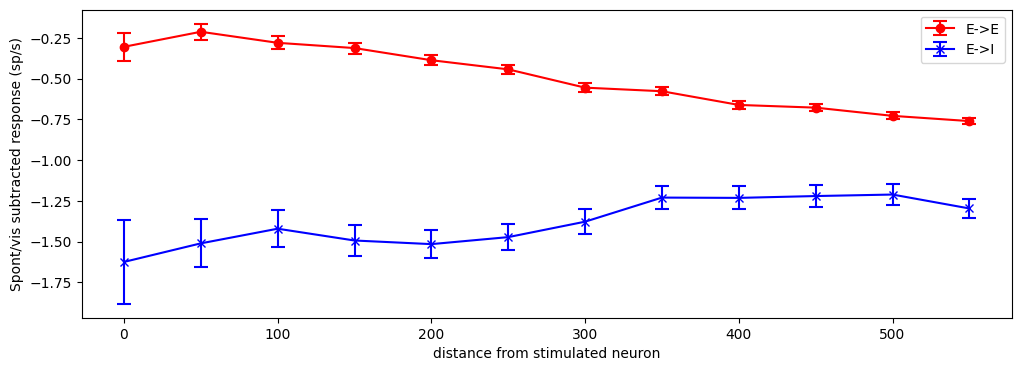

In [84]:
stim_label = "E" if stim_sheet_name == 'V1_Exc_L2/3' else "I" 

def flatten_raws(edges,raws):
    new_edges = []
    new_raws = []
    for e,r in zip(edges,raws):
        new_edges.extend([e]*len(r))
        new_raws.extend(r)
    return new_edges,new_raws

if not spont:
    single_edges_exc_64,single_rates_exc_64 = flatten_raws(exc_bin_edges_64[:-1],exc_raw_64)
    single_edges_inh_64,single_rates_inh_64 = flatten_raws(inh_bin_edges_64[:-1],inh_raw_64)

    single_edges_exc_8,single_rates_exc_8 = flatten_raws(exc_bin_edges_8[:-1],exc_raw_8)
    single_edges_inh_8,single_rates_inh_8 = flatten_raws(inh_bin_edges_8[:-1],inh_raw_8)
    
    pylab.figure(figsize=(12,4))

    pylab.subplot(1,2,1)
    #pylab.plot(single_edges_exc_64,single_rates_exc_64,'ro',markerfacecolor='none')
    #pylab.plot(single_edges_inh_64,single_rates_inh_64,'bo',markerfacecolor='none')
    pylab.errorbar(exc_bin_edges_64[:-1],exc_rates_64,yerr=1.96*exc_sem_64,fmt='o-r',label=stim_label+"->E",capsize=5,capthick=1.5,elinewidth=1.5)
    pylab.errorbar(inh_bin_edges_64[:-1],inh_rates_64,yerr=1.96*inh_sem_64,fmt='x-b',label=stim_label+"->I",capsize=5,capthick=1.5,elinewidth=1.5)
    #pylab.plot([exc_bin_edges_64[0],exc_bin_edges_64[-1]],[0,0],'k-')
    pylab.xlabel('distance from stimulated neuron')
    pylab.ylabel('Response relative to visual stim alone')
    pylab.legend()
    pylab.title('Grating contrast: 4')
    
    pylab.subplot(1,2,2)
    #pylab.plot(single_edges_exc_8,single_rates_exc_8,'ro',markerfacecolor='none')
    #pylab.plot(single_edges_inh_8,single_rates_inh_8,'bo',markerfacecolor='none')
    pylab.errorbar(exc_bin_edges_8[:-1],exc_rates_8,yerr=1.96*exc_sem_8,fmt='x-r',label=stim_label+"->E",capsize=5,capthick=1.5,elinewidth=1.5)
    pylab.errorbar(inh_bin_edges_8[:-1],inh_rates_8,yerr=1.96*inh_sem_8,fmt='x-b',label=stim_label+"->I",capsize=5,capthick=1.5,elinewidth=1.5)
    #pylab.plot([exc_bin_edges_8[0],exc_bin_edges_8[-1]],[0,0],'k-')
    pylab.xlabel('distance from stimulated neuron')
    pylab.ylabel('Response relative to visual stim alone')
    pylab.legend()
    pylab.title('Grating contrast: 2')
    
else:
    single_edges_exc,single_rates_exc = flatten_raws(exc_bin_edges[:-1],exc_raw)
    single_edges_inh,single_rates_inh = flatten_raws(exc_bin_edges[:-1],inh_raw)

    pylab.figure(figsize=(12,4))
    #pylab.plot(single_edges_exc,single_rates_exc,'ro',markerfacecolor='none')
    #pylab.plot(single_edges_inh,single_rates_inh,'bo',markerfacecolor='none')
    pylab.errorbar(exc_bin_edges[:-1],exc_rates,yerr=1.96*exc_sem,fmt='o-r',label=stim_label+"->E",capsize=5,capthick=1.5,elinewidth=1.5)
    pylab.errorbar(inh_bin_edges[:-1],inh_rates,yerr=1.96*inh_sem,fmt='x-b',label=stim_label+"->I",capsize=5,capthick=1.5,elinewidth=1.5)
    #pylab.plot([exc_bin_edges[0],exc_bin_edges[-1]],[0,0],'k-')    
    pylab.xlabel('distance from stimulated neuron')
    pylab.ylabel('Spont/vis subtracted response (sp/s)')
    pylab.legend()
    


nan


/home/antolikjan/virt_env/mozaikluca/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/antolikjan/virt_env/mozaikluca/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


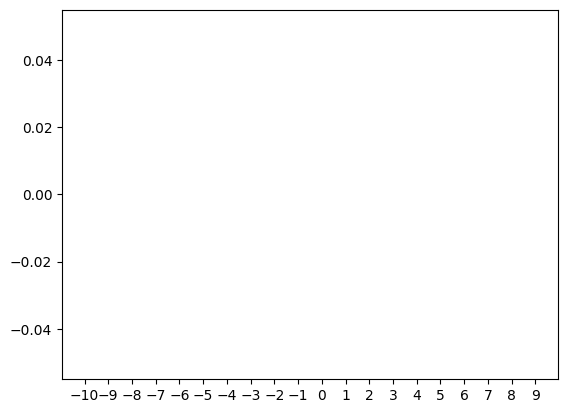

In [78]:
pylab.hist(exc_raw_64[5],bins=[*range(-10,10)])
pylab.xticks([*range(-10,10)])
print(numpy.mean(exc_raw_64[5]))